## This comparison is done with a Laser Ball (COUMARIN-500, official)


In [1]:
import ROOT, rat
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline   


TClass::TClass:0: RuntimeWarning: no dictionary for class omtext is available


In [2]:
outdir = '/home/jp/Dropbox/workflowy/snoplus/geo_validation'

In [3]:
sys.path.append('/home/jp/projects/snoplus/snoing/install/rat-dev/example/pyroot')
sys.path.append('/home/jp/projects/python_tools')
sys.path.append('/home/jp/projects/snoplus/python_modules')

In [4]:
import jp_mpl as jplot
import lowlevel_stats
reload(lowlevel_stats)

<module 'lowlevel_stats' from '/home/jp/projects/snoplus/python_modules/lowlevel_stats.pyc'>

In [5]:
# Load the calibration data
data_dir = '/home/jp/projects/snoplus/data/oca'
file_list = os.listdir(data_dir)
print file_list
binc  = []
xaxis = []

for one_file in file_list:
    tfile = ROOT.TFile(os.path.join(data_dir, one_file))
    
    print 'File information'
    spos = np.array(tfile.Get('source_pos'))
    print 'Position: ', spos
    lamb = np.array(tfile.Get('lambda'))
    print 'Lambda ', lamb
    cast = np.array(tfile.Get('cast'))
    print 'Cast ', cast
    version = np.array(tfile.Get('version'))
    print 'Version ', version
    
    # Getting the info out of this one file
    caltime = tfile.Get('fRchTime')
    caltime_x = caltime.ProjectionX()
    rootaxis = caltime_x.GetXaxis()
    
    nbins = caltime_x.GetNbinsX()
    binc.append(np.zeros(nbins))
    xaxis.append(np.zeros(nbins+1))
    
    for ibin in range(nbins):
        binc[-1][ibin]  = caltime_x.GetBinContent(ibin)
        xaxis[-1][ibin] = rootaxis.GetBinLowEdge(ibin)
    xaxis[-1][nbins] = rootaxis.GetBinLowEdge(nbins)    

    
    


['sno_010622_p4.rch', 'sno_010623_p3.rch', 'sno_010625_p4.rch']
File information
Position:  [  0.13         0.86000001   0.14        99.70478058]
Lambda  [   4.  500.]
Cast  [  4.00000000e+00   4.00000000e+00   1.99999996e-02   8.50000024e-01
   6.65400009e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]
Version  [ 1.]
File information
Position:  [  0.23         0.81999999   0.15000001  99.73439026]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.13         0.86000001  66.54000092   0.           0.
   0.           0.           0.           0.           0.           0.           0.
   0.        ]
Version  [ 1.]
File information
Position:  [  0.23         0.79000002   0.15000001  43.71563339]
Lambda  [   4.  500.]
Cast  [  4.           4.           0.23         0.79000002  66.55000305   0.           0.
   0.           0.           0.           0.     

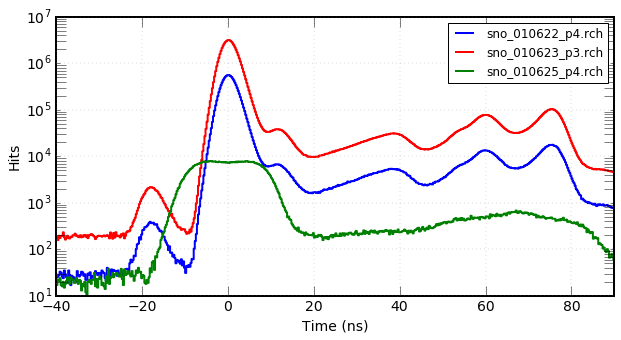

In [6]:
fig = plt.figure(figsize=(10,5))
jplot.unfilledBar(xaxis[0], binc[0], color = 'blue', label = file_list[0])
jplot.unfilledBar(xaxis[1], binc[1], color = 'red', label = file_list[1])
jplot.unfilledBar(xaxis[2], binc[2], color = 'green', label = file_list[2])

plt.yscale('log')
plt.xlim([-40, 90])
plt.ylim([10,1e7])
plt.ylabel('Hits')
plt.xlabel('Time (ns)')
plt.legend()

In [7]:
calx = xaxis[1]
caly = binc[1]

In [8]:
basedir = '/home/jp/projects/snoplus/rundir/laserball_oca'
fname = 'laserball_oca_water.root'

In [9]:
# SNOPLUS official
dirname = 'snoplus_water'
file_name = os.path.join(basedir, dirname, fname)
print file_name
sno = lowlevel_stats.getMChits(file_name)
sno_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
sno_petimes  = lowlevel_stats.getPETimes_MC(file_name)
snoqtot, snoqpmt, snoxpmt, snotr= lowlevel_stats.getPEcharge(file_name)

/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water/laserball_oca_water.root


In [10]:
# SNOPLUS official d2o
dirname = 'snoplus_heavywater_fulldaq'
file_name = os.path.join(basedir, dirname, fname)
print file_name
sn2o = lowlevel_stats.getMChits(file_name)
sn2o_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
sn2o_petimes  = lowlevel_stats.getPETimes_MC(file_name)
sn2oqtot, sn2oqpmt, sn2oxpmt, sn2otr= lowlevel_stats.getPEcharge(file_name)

/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_heavywater_fulldaq/laserball_oca_water.root


In [10]:
# SNOPLUS greydisc
dirname = 'snoplus_water_greydisc'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogd = lowlevel_stats.getMChits(file_name)
snogd_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogd_petimes  = lowlevel_stats.getPETimes_MC(file_name)


/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_greydisc/laserball_oca_water.root


In [11]:
# SNOPLUS greydisc with NormalReflect
dirname = 'snoplus_water_greydisc_NormalReflect'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogdnr = lowlevel_stats.getMChits(file_name)
snogdnr_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogdnr_petimes  = lowlevel_stats.getPETimes_MC(file_name)


/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_greydisc_NormalReflect/laserball_oca_water.root


In [12]:
# SNOPLUS greydisc
dirname = 'snoplus_water_fulldaq_greydisc'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snodaqgd = lowlevel_stats.getMChits(file_name)
snodaqgd_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snodaqgd_petimes  = lowlevel_stats.getPETimes_MC(file_name)


/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_fulldaq_greydisc/laserball_oca_water.root


In [13]:
# SNOPLUS greydisc salt optics
dirname = 'snoplus_water_greydiscsalt'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogds = lowlevel_stats.getMChits(file_name)
snogds_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogds_petimes  = lowlevel_stats.getPETimes_MC(file_name)


/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_greydiscsalt/laserball_oca_water.root


In [14]:
dirname = 'snoplus_water_greydisc_1.25eff'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snogdjp = lowlevel_stats.getMChits(file_name)
snogdjp_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snogdjp_petimes  = lowlevel_stats.getPETimes_MC(file_name)
snoqtot_gdjp, snoqpmt_gdjp, snoxpmt_gdjp, snotr_gdjp   = \
    lowlevel_stats.getPEcharge(file_name)

/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_greydisc_1.25eff/laserball_oca_water.root


In [19]:
dirname = 'snoplus_water_fulldaq'
file_name = os.path.join(basedir, dirname, fname)
print file_name
snodaq = lowlevel_stats.getMChits(file_name)
snodaq_hittimes = lowlevel_stats.getHitTimes_MC(file_name)
snodaq_petimes  = lowlevel_stats.getPETimes_MC(file_name)

/home/jp/projects/snoplus/rundir/laserball_oca/snoplus_water_fulldaq/laserball_oca_water.root


## Checking the NHits distribution

In [16]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotNhits(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(0, 100, 2)

    nbins = []
    for i, one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'SUM ', one_nhits.sum()
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n*scale_factor[i], 
                        error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

        
        
    plt.xlabel('Nhits (laserball @500nm)')
    plt.ylabel('Entries per event')
    
    #plt.ylim([0,])
    plt.legend(loc=0,ncol=2)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SUM  54492
Mean  54.492
Std   7.154015376
SUM  43736
Mean  43.736
Std   6.52428570803
SUM  51529
Mean  51.529
Std   7.05826883875
SUM  53112
Mean  53.112
Std   6.96774396774
SUM  39470
Mean  39.5490981964
Std   6.20742768829
SUM  31626
Mean  32.0750507099
Std   5.22965935458
SUM  30875
Mean  31.3770325203
Std   5.21441881246


/home/jp/projects/python_tools/jp_mpl.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if error == None:


SNO
SNO GD
SNO GDsalt
SNO GDjp
SNO FullDAQ
SNO GD FullDAQ
SNO GD FullDAQ NormRef


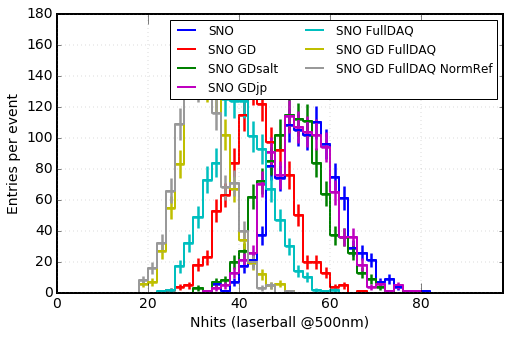

In [17]:
plotNhits([sno, snogd, snogds, snogdjp, snodaq, snodaqgd, snogdnr],
            [1., 1., 1., 1., 1., 1., 1.], 
          ['SNO','SNO GD', 'SNO GDsalt', 'SNO GDjp', 
           'SNO FullDAQ', 'SNO GD FullDAQ', 'SNO GD FullDAQ NormRef'], 
          'LBall_OCA_SNO_official_vs_greydisc')

In [18]:
print 54.492/43.736

1.24593012621


## Checking the hit times distribution

In [13]:
mycolors = ['b','r','g','m','c', 'y', '0.6']

# Calibration scaling in number of photons
ti, tf = -5, 90
cal_range = [np.where(calx>ti)[0][0],np.where(calx>tf)[0][0]]
#print mc_range, cal_range
calwidth= calx[1]-calx[0]
calsum = caly[cal_range[0]:cal_range[1]].sum()*calwidth
print calsum

def plotTOA(nhits_list = [], scale_factor = [], labels = [], figname = ''):
    xaxis = np.arange(-200, 500, 0.3)#20, 4000)
    nbins = []
    for i,one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'Mean ', one_nhits.mean()*scale_factor[i]
        print 'Std  ', one_nhits.std()*scale_factor[i]
        
    # Find the peak and place it at t=0
    xaxis = xaxis - xaxis[nbins[0].argmax()]
    mc_range  = [np.where(xaxis>ti)[0][0],np.where(xaxis>tf)[0][0]]
    mcwidth = xaxis[1]-xaxis[0]

    
        
    myfig = plt.figure(figsize=(10,5))
    for i, one_n in enumerate(nbins):
        mcintegral = np.sum(one_n[mc_range[0]:mc_range[1]])*mcwidth
        factor = calsum/mcintegral

        print 'MCintegral', mcintegral
        print 'Factor', factor
        jplot.unfilledBar(xaxis, factor*one_n*scale_factor[i], 
                              color = mycolors[i], label=labels[i])
        #jplot.errorMark(xaxis, factor*one_n*scale_factor[i], 
        #                error=np.sqrt(one_n)*scale_factor[i], color=mycolors[i])
        print labels[i]

    
    
    
    #factor = nbins[0].sum()*mcwidth/caly.sum()/calwidth
    #print factor
    jplot.unfilledBar(calx, caly, color='k', label='Calibration')
    
    
    plt.xlabel('Hit time (ns, laserball @500nm)')
    plt.ylabel('Hits (rescaled to preserve integral)')        
    plt.xlim([-50, 90])
    plt.ylim([500, factor*nbins[0].max()*2])
    
    plt.yscale('log')
    #plt.ylim([0,])

    plt.legend(loc=0)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

17001090.0


Mean  167.787261809
Std   110.695091176
Mean  174.302728613
Std   120.424774469
Mean  170.698589036
Std   114.314803146
Mean  169.996948287
Std   113.153143024
Mean  149.251597331
Std   39.9422961923
Mean  151.761401244
Std   45.0165942877
Mean  151.339137175
Std   44.3469975311
MCintegral 24568.0
Factor 692.001383914
SNO
MCintegral 19252.0
Factor 883.081757739
SNO GD
MCintegral 23050.0
Factor 737.574403471
SNO GDsalt
MCintegral 23862.5
Factor 712.460555265
SNO GDjp
MCintegral 18370.5
Factor 925.456030048
SNO fDAQ
MCintegral 14467.0
Factor 1175.1634755
SNO GD fDAQ
MCintegral 14147.0
Factor 1201.74524634
SNO GD FullDAQ NormRef


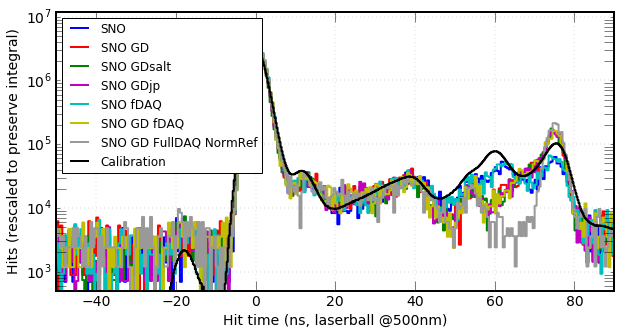

In [22]:
plotTOA([sno_hittimes, snogd_hittimes, snogds_hittimes, snogdjp_hittimes, 
         snodaq_hittimes, snodaqgd_hittimes, snogdnr_hittimes],
        [1., 1., 1., 1., 1., 1.,1.], 
        ['SNO','SNO GD', 'SNO GDsalt', 'SNO GDjp', 
         'SNO fDAQ', 'SNO GD fDAQ','SNO GD FullDAQ NormRef'], 
          'LBall_OCA_TOA_SNO_official_vs_greydisc')

Mean  167.787261809
Std   110.695091176
Mean  169.996948287
Std   113.153143024
MCintegral 24568.0
Factor 692.001383914
SNO
MCintegral 23862.5
Factor 712.460555265
SNO GD


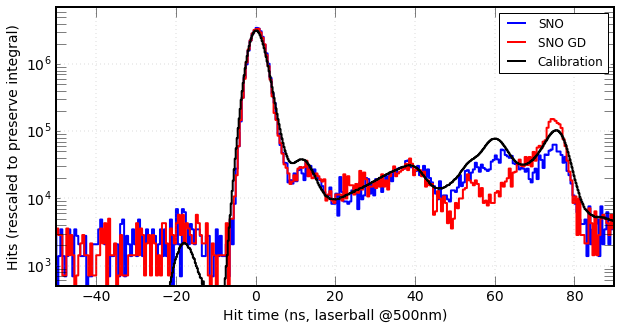

In [23]:
plotTOA([sno_hittimes, snogdjp_hittimes],
        [1., 1., 1.], 
        ['SNO','SNO GD'], 
          'LBall_OCA_TOA_SNO_official_vs_greydisc_light2')

Mean  150.249492813
Std   38.1351333031
Mean  149.157321231
Std   39.640662339
MCintegral 14419.2
Factor 1179.05917111
SNO D2O
MCintegral 11043.9
Factor 1539.40999104
SNO H2O


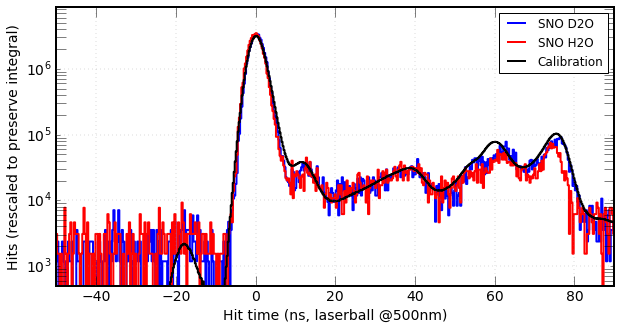

In [21]:
plotTOA([ sn2o_hittimes, snodaq_hittimes],
        [ 1., 1.], 
        ['SNO D2O', 'SNO H2O'], 
          'LBall_OCA_TOA_SNO_official_vs_water')

In [24]:
plotTOA([sno_hittimes, snogd_hittimes, snogds_hittimes, snogdjp_hittimes, snodaq],
        [1.], 
        ['SNO fDAQ'], 
          'LBall_OCA_TOA_SNO_official_vs_greydisc')

Mean  167.787261809
Std   110.695091176
Mean 

IndexError: list index out of range

Mean  167.021174289
Std   110.639354245
Mean  173.488448782
Std   120.39995309
SNO
SNO GreyDisc


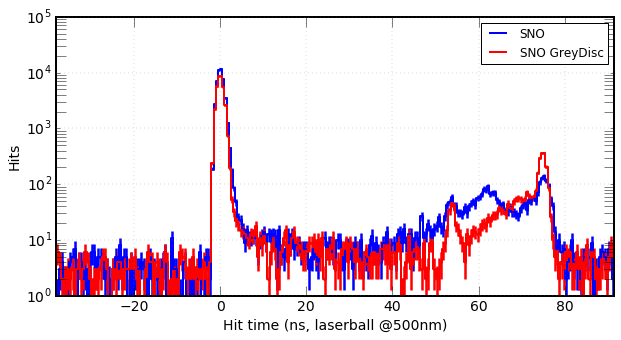

In [60]:
plotTOA([sno_petimes, snogd_petimes],[1., 1], ['SNO','SNO GreyDisc'], 
          'LBall_OCA_TOApe_SNO_official_vs_greydisc')

## Checking the charge distribution

In [132]:
mycolors = ['b','r','g','m','c', 'y', '0.6']
def plotPEdist(nhits_list = [], labels = [],
               xaxis = np.arange(0,100,2), figname = '',
              ylabel = 'Entries per event'):

    nbins = []
    for i, one_nhits in enumerate(nhits_list):
        n, x = np.histogram(one_nhits, xaxis)
        nbins.append(n)
        print 'SUM ', one_nhits.sum()
        print 'Mean ', one_nhits.mean()
        print 'Std  ', one_nhits.std()
        
    myfig = plt.figure(figsize=(8,5))
    for i, one_n in enumerate(nbins):
        jplot.unfilledBar(xaxis, one_n, 
                              color = mycolors[i], label=labels[i])
        jplot.errorMark(xaxis, one_n, 
                        error=np.sqrt(one_n), color=mycolors[i])
        print labels[i]

        
        
    plt.xlabel('Charge (laserball @500nm)')
    plt.ylabel(ylabel)
    
    #plt.ylim([0,])
    plt.legend(loc=0,ncol=2)
    if len(figname) > 0:
        myfig.savefig(os.path.join(outdir, figname + '.png'), dpi=300)

SUM  1705512.91557
Mean  31.1942224013
Std   33.9748851133
SUM  1654055.02092
Mean  31.0346740139
Std   33.5084607536
SNO
SNO GDjp


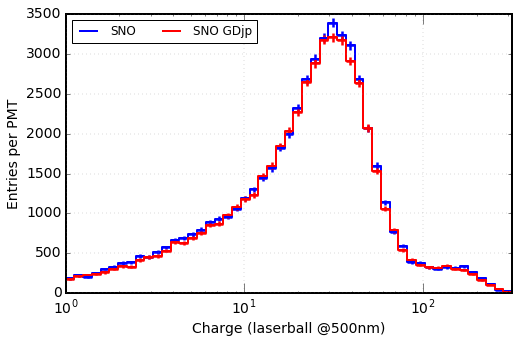

In [140]:
plotPEdist(nhits_list = [snoqpmt, snoqpmt_gdjp],
           #xaxis = np.linspace(0.001, 100, 102),
           xaxis = 10**np.linspace(0,2.5,52),
           labels = ['SNO','SNO GDjp'],
           ylabel = 'Entries per PMT',
           figname = 'LBall_OCA_Qpmt_SNO_official_vs_greydisc')
plt.xscale('log')

SUM  1705512.91557
Mean  1705.51291557
Std   332.610141523
SUM  1654055.02092
Mean  1654.05502092
Std   329.571218822
SNO
SNO GDjp


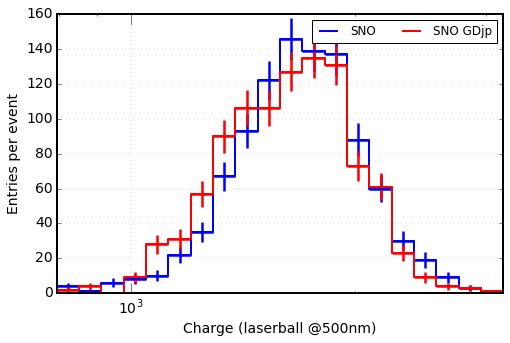

In [139]:
plotPEdist(nhits_list = [snoqtot, snoqtot_gdjp],
           #xaxis = np.linspace(0.001, 100, 102),
           xaxis = 10**np.linspace(2.9,3.5,21),
           labels = ['SNO','SNO GDjp'],
           ylabel = 'Entries per event',
           figname = 'LBall_OCA_Qev_SNO_official_vs_greydisc')
plt.xscale('log')

In [143]:
print 'Mean # of tracks that contribute', snotr.mean(), snotr_gdjp.mean()

Mean # of tracks that contribute 1.0 1.0


In [156]:
print 'Mean # of PEs per PMT', \
    snoxpmt[snoxpmt>0].mean(), snoxpmt_gdjp[snoxpmt_gdjp>0].mean()
print 'More than 2 PEs per PMT', \
    np.sum(snoxpmt>1), np.sum(snoxpmt_gdjp>1)

Mean # of PEs per PMT 1.00333993981 1.0034832053
More than 2 PEs per PMT 180 185


SUM  54674
Mean  0.103246347364
Std   0.305420153378
SUM  53297
Mean  0.100348887345
Std   0.301621672214
SNO
SNO GDjp


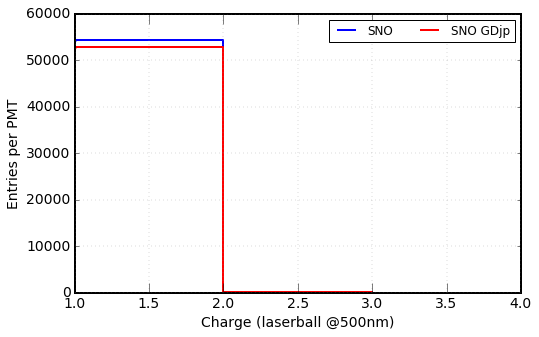

In [157]:
plotPEdist(nhits_list = [snoxpmt, snoxpmt_gdjp],
           #xaxis = np.linspace(0.001, 100, 102),
           xaxis = np.arange(1, 5, 1),
           labels = ['SNO','SNO GDjp'],
           ylabel = 'Entries per PMT',
           figname = 'LBall_OCA_PEpmt_SNO_official_vs_greydisc')
#plt.xscale('log')